# **Домашнее задание №1 (base)**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;
* реализовать веб-сервис для применения построенной модели на новых данных

**Максимальная оценка за дз**
> Оценка за домашку = $min(\text{ваш балл}, 11)$

**Мягкий дедлайн: 27 ноября 23:59**

**Жесткий дедлайн: 20 декабря 23:59 (конец модуля)**


**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

**Задание 0 (0 баллов).**
Для чего фиксируем сиды в домашках?

 - Для воспроизводимости результатов

# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (2.5 балла)
- Визуализации признаков и их анализ (1 балл)

Всего можно набрать 3.5 основных балла и 0.65 бонусных. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (2.5 балла)**

In [2]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1 (0.55 балла)**

Выполните операции, направленные на практику основных действий с `pandas`:
- [ ] Отобразите 10 случайных строк тренировочного датасета (0.15 балла)
- [ ] Отобразите первые 5 и последние 5 объектов тестового датасета (0.1 балла)
- [ ] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)


**Бонус**
- [ ] Постройте дашборд, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)

In [3]:
df_train.sample(10)

name  year  selling_price  km_driven  \
6565        Renault KWID Climber 1.0 MT BSIV  2019         300000      35000   
2943                      Maruti Wagon R LXI  2013         225000      58343   
2024                    Hyundai i20 Asta 1.2  2013         360000      30000   
263                     Hyundai i20 1.2 Asta  2010         300000      70000   
4586        Skoda Octavia L and K 1.9 TDI MT  2005         250000     120000   
4479                         Maruti Ciaz ZXi  2016         700000      20000   
4881  Hyundai Grand i10 1.2 Kappa Magna BSIV  2017         445000      27000   
3583          Ford Ecosport 1.5 DV5 MT Trend  2016         515000      68609   
6361                  Hyundai Verna 1.4 VTVT  2014         500000      33400   
4108                     Hyundai i20 Era 1.2  2015         490000      45900   

        fuel       seller_type transmission         owner     mileage  \
6565  Petrol        Individual       Manual   First Owner  23.01 kmpl   
2943  Petrol  Trustmark Dealer       Manual   First Owner  21.79 kmpl   
2024  Petrol        Individual       Manual   First Owner   18.5 kmpl   
263   Petrol        Individual       Manual   First Owner   17.0 kmpl   
4586  Diesel        Individual       Manual   Third Owner   16.4 kmpl   
4479  Petrol        Individual       Manual   First Owner  20.73 kmpl   
4881  Petrol        Individual       Manual   First Owner   18.9 kmpl   
3583  Diesel            Dealer       Manual   First Owner   22.7 kmpl   
6361  Petrol        Individual       Manual   First Owner  17.43 kmpl   
4108  Petrol        Individual       Manual  Second Owner   18.6 kmpl   

       engine  max_power                 torque  seats  
6565   999 CC     67 bhp          91Nm@ 4250rpm    5.0  
2943   998 CC  67.05 bhp          90Nm@ 3500rpm    5.0  
2024  1197 CC  82.85 bhp       113.7Nm@ 4000rpm    5.0  
263   1197 CC     80 bhp  11.4 kgm at 4,000 rpm    5.0  
4586  1896 CC     90 bhp  21.4@ 1,900(kgm@ rpm)    5.0  
4479  1373 CC   91.1 bhp         130Nm@ 4000rpm    5.0  
4881  1197 CC  81.86 bhp      113.75nm@ 4000rpm    5.0  
3583  1498 CC  89.84 bhp    204Nm@ 2000-2750rpm    5.0  
6361  1396 CC  105.5 bhp       135.3Nm@ 5000rpm    5.0  
4108  1197 CC  81.83 bhp       114.7Nm@ 4000rpm    5.0

In [4]:
df_train.head()

name  year  selling_price  km_driven    fuel  \
0         Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1   Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
3         Maruti Swift VXI BSIII  2007         130000     120000  Petrol   
4  Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000  Petrol   

  seller_type transmission         owner     mileage   engine   max_power  \
0  Individual       Manual   First Owner   23.4 kmpl  1248 CC      74 bhp   
1  Individual       Manual  Second Owner  21.14 kmpl  1498 CC  103.52 bhp   
2  Individual       Manual   First Owner   23.0 kmpl  1396 CC      90 bhp   
3  Individual       Manual   First Owner   16.1 kmpl  1298 CC    88.2 bhp   
4  Individual       Manual   First Owner  20.14 kmpl  1197 CC   81.86 bhp   

                     torque  seats  
0            190Nm@ 2000rpm    5.0  
1       250Nm@ 1500-2500rpm    5.0  
2  22.4 kgm at 1750-2750rpm    5.0  
3     11.5@ 4,500(kgm@ rpm)    5.0  
4         113.75nm@ 4000rpm    5.0

In [5]:
df_train.tail()

name  year  selling_price  km_driven    fuel  \
6994       Hyundai i20 Magna  2013         320000     110000  Petrol   
6995   Hyundai Verna CRDi SX  2007         135000     119000  Diesel   
6996  Maruti Swift Dzire ZDi  2009         382000     120000  Diesel   
6997         Tata Indigo CR4  2013         290000      25000  Diesel   
6998         Tata Indigo CR4  2013         290000      25000  Diesel   

     seller_type transmission                 owner     mileage   engine  \
6994  Individual       Manual           First Owner   18.5 kmpl  1197 CC   
6995  Individual       Manual  Fourth & Above Owner   16.8 kmpl  1493 CC   
6996  Individual       Manual           First Owner   19.3 kmpl  1248 CC   
6997  Individual       Manual           First Owner  23.57 kmpl  1396 CC   
6998  Individual       Manual           First Owner  23.57 kmpl  1396 CC   

      max_power                     torque  seats  
6994  82.85 bhp           113.7Nm@ 4000rpm    5.0  
6995    110 bhp  24@ 1,900-2,750(kgm@ rpm)    5.0  
6996   73.9 bhp             190Nm@ 2000rpm    5.0  
6997     70 bhp        140Nm@ 1800-3000rpm    5.0  
6998     70 bhp        140Nm@ 1800-3000rpm    5.0

In [6]:
missed_values = df_train.isna().sum().reset_index()
missed_values.loc[missed_values[0]>0]['index']

8       mileage
9        engine
10    max_power
11       torque
12        seats
Name: index, dtype: object

In [7]:
df_train[df_train.duplicated].sort_values(df_train.columns.tolist())

name  year  selling_price  km_driven  \
6307  Audi Q3 2.0 TDI Quattro Premium Plus  2017        2825000      22000   
6704               Audi Q5 3.0 TDI Quattro  2014        1850000      76131   
1337            Audi Q5 35TDI Premium Plus  2018        3975000      31800   
1595            Audi Q5 35TDI Premium Plus  2018        3975000      31800   
2787            Audi Q5 35TDI Premium Plus  2018        3975000      31800   
...                                    ...   ...            ...        ...   
5637        Volvo XC40 D4 Inscription BSIV  2019        3800000      20000   
5652        Volvo XC40 D4 Inscription BSIV  2019        3800000      20000   
5753        Volvo XC40 D4 Inscription BSIV  2019        3800000      20000   
5991        Volvo XC40 D4 Inscription BSIV  2019        3800000      20000   
6778        Volvo XC40 D4 Inscription BSIV  2019        3800000      20000   

        fuel seller_type transmission        owner     mileage   engine  \
6307  Diesel      Dealer    Automatic  First Owner  15.73 kmpl  1968 CC   
6704  Diesel  Individual    Automatic  First Owner  13.22 kmpl  2967 CC   
1337  Diesel      Dealer    Automatic  First Owner  17.01 kmpl  1968 CC   
1595  Diesel      Dealer    Automatic  First Owner  17.01 kmpl  1968 CC   
2787  Diesel      Dealer    Automatic  First Owner  17.01 kmpl  1968 CC   
...      ...         ...          ...          ...         ...      ...   
5637  Diesel  Individual    Automatic  First Owner   18.0 kmpl  1969 CC   
5652  Diesel  Individual    Automatic  First Owner   18.0 kmpl  1969 CC   
5753  Diesel  Individual    Automatic  First Owner   18.0 kmpl  1969 CC   
5991  Diesel  Individual    Automatic  First Owner   18.0 kmpl  1969 CC   
6778  Diesel  Individual    Automatic  First Owner   18.0 kmpl  1969 CC   

       max_power               torque  seats  
6307  174.33 bhp  380Nm@ 1750-2500rpm    5.0  
6704   241.4 bhp  580Nm@ 1400-3250rpm    5.0  
1337     188 bhp  400nm@ 1750-3000rpm    5.0  
1595     188 bhp  400nm@ 1750-3000rpm    5.0  
2787     188 bhp  400nm@ 1750-3000rpm    5.0  
...          ...                  ...    ...  
5637     190 bhp                400Nm    5.0  
5652     190 bhp                400Nm    5.0  
5753     190 bhp                400Nm    5.0  
5991     190 bhp                400Nm    5.0  
6778     190 bhp                400Nm    5.0  

[985 rows x 13 columns]

In [228]:
# !pip install ydata-profiling
from ydata_profiling import ProfileReport

profile = ProfileReport(df_train, title="Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [229]:
from google.colab import files

profile.to_file("profiling_report.html")
files.download("profiling_report.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Мы обнаружили пропуски. Давайте избавимся от них.

- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете про *тренировочному* набору данных и им же заполняете *тестовый*.

In [9]:
missed_values = df_train.isna().sum().reset_index()
missed_values = missed_values.loc[missed_values[0]>0]['index']
missed_values

8       mileage
9        engine
10    max_power
11       torque
12        seats
Name: index, dtype: object

In [10]:
for col in missed_values:
    # если признак строка передаем из середины по алфавиту
    if df_train[col].dtype == 'O':
        median_indx = len(df_train[col].sort_values()) // 2
        median = df_train[col][median_indx]
        df_train[col] = df_train[col].fillna(median)
        df_test[col] = df_test[col].fillna(median)
    else:
    # в остальных случаях просто медиана
        median_indx = len(df_train[col].sort_values()) // 2
        median = df_train[col].median()
        df_train[col] = df_train[col].fillna(median)
        df_test[col] = df_test[col].fillna(median)

missed_values = df_train.isna().sum().reset_index()
missed_values.loc[missed_values[0]>0]['index']

Series([], Name: index, dtype: object)

### **Задание 2 (0.5 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [ ] Отобразите такие объекты (0.15 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


In [11]:
# посмотрим есть ли такие объекты
duplicate_indx = df_train.duplicated(subset=df_train.columns.drop('selling_price'),keep=False)
df_train[duplicate_indx].sort_values(df_train.columns.drop('selling_price').tolist())

name  year  selling_price  km_driven  \
1703  Audi Q3 2.0 TDI Quattro Premium Plus  2017        2825000      22000   
6307  Audi Q3 2.0 TDI Quattro Premium Plus  2017        2825000      22000   
1836               Audi Q5 3.0 TDI Quattro  2014        1850000      76131   
6704               Audi Q5 3.0 TDI Quattro  2014        1850000      76131   
117             Audi Q5 35TDI Premium Plus  2018        3975000      31800   
...                                    ...   ...            ...        ...   
5637        Volvo XC40 D4 Inscription BSIV  2019        3800000      20000   
5652        Volvo XC40 D4 Inscription BSIV  2019        3800000      20000   
5753        Volvo XC40 D4 Inscription BSIV  2019        3800000      20000   
5991        Volvo XC40 D4 Inscription BSIV  2019        3800000      20000   
6778        Volvo XC40 D4 Inscription BSIV  2019        3800000      20000   

        fuel seller_type transmission        owner     mileage   engine  \
1703  Diesel      Dealer    Automatic  First Owner  15.73 kmpl  1968 CC   
6307  Diesel      Dealer    Automatic  First Owner  15.73 kmpl  1968 CC   
1836  Diesel  Individual    Automatic  First Owner  13.22 kmpl  2967 CC   
6704  Diesel  Individual    Automatic  First Owner  13.22 kmpl  2967 CC   
117   Diesel      Dealer    Automatic  First Owner  17.01 kmpl  1968 CC   
...      ...         ...          ...          ...         ...      ...   
5637  Diesel  Individual    Automatic  First Owner   18.0 kmpl  1969 CC   
5652  Diesel  Individual    Automatic  First Owner   18.0 kmpl  1969 CC   
5753  Diesel  Individual    Automatic  First Owner   18.0 kmpl  1969 CC   
5991  Diesel  Individual    Automatic  First Owner   18.0 kmpl  1969 CC   
6778  Diesel  Individual    Automatic  First Owner   18.0 kmpl  1969 CC   

       max_power               torque  seats  
1703  174.33 bhp  380Nm@ 1750-2500rpm    5.0  
6307  174.33 bhp  380Nm@ 1750-2500rpm    5.0  
1836   241.4 bhp  580Nm@ 1400-3250rpm    5.0  
6704   241.4 bhp  580Nm@ 1400-3250rpm    5.0  
117      188 bhp  400nm@ 1750-3000rpm    5.0  
...          ...                  ...    ...  
5637     190 bhp                400Nm    5.0  
5652     190 bhp                400Nm    5.0  
5753     190 bhp                400Nm    5.0  
5991     190 bhp                400Nm    5.0  
6778     190 bhp                400Nm    5.0  

[1799 rows x 13 columns]

In [12]:
df_train = df_train.drop_duplicates(subset=df_train.columns.drop('selling_price')).reset_index(drop=True)
df_train

name  year  selling_price  km_driven  \
0                Maruti Swift Dzire VDI  2014         450000     145500   
1          Skoda Rapid 1.5 TDI Ambition  2014         370000     120000   
2             Hyundai i20 Sportz Diesel  2010         225000     127000   
3                Maruti Swift VXI BSIII  2007         130000     120000   
4         Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000   
...                                 ...   ...            ...        ...   
5835            Hyundai Santro Xing GLS  2008         120000     191000   
5836  Maruti Wagon R VXI BS IV with ABS  2013         260000      50000   
5837                  Hyundai i20 Magna  2013         320000     110000   
5838              Hyundai Verna CRDi SX  2007         135000     119000   
5839             Maruti Swift Dzire ZDi  2009         382000     120000   

        fuel seller_type transmission                 owner     mileage  \
0     Diesel  Individual       Manual           First Owner   23.4 kmpl   
1     Diesel  Individual       Manual          Second Owner  21.14 kmpl   
2     Diesel  Individual       Manual           First Owner   23.0 kmpl   
3     Petrol  Individual       Manual           First Owner   16.1 kmpl   
4     Petrol  Individual       Manual           First Owner  20.14 kmpl   
...      ...         ...          ...                   ...         ...   
5835  Petrol  Individual       Manual           First Owner  17.92 kmpl   
5836  Petrol  Individual       Manual          Second Owner   18.9 kmpl   
5837  Petrol  Individual       Manual           First Owner   18.5 kmpl   
5838  Diesel  Individual       Manual  Fourth & Above Owner   16.8 kmpl   
5839  Diesel  Individual       Manual           First Owner   19.3 kmpl   

       engine   max_power                     torque  seats  
0     1248 CC      74 bhp             190Nm@ 2000rpm    5.0  
1     1498 CC  103.52 bhp        250Nm@ 1500-2500rpm    5.0  
2     1396 CC      90 bhp   22.4 kgm at 1750-2750rpm    5.0  
3     1298 CC    88.2 bhp      11.5@ 4,500(kgm@ rpm)    5.0  
4     1197 CC   81.86 bhp          113.75nm@ 4000rpm    5.0  
...       ...         ...                        ...    ...  
5835  1086 CC    62.1 bhp            96.1Nm@ 3000rpm    5.0  
5836   998 CC    67.1 bhp              90Nm@ 3500rpm    5.0  
5837  1197 CC   82.85 bhp           113.7Nm@ 4000rpm    5.0  
5838  1493 CC     110 bhp  24@ 1,900-2,750(kgm@ rpm)    5.0  
5839  1248 CC    73.9 bhp             190Nm@ 2000rpm    5.0  

[5840 rows x 13 columns]

In [13]:
assert df_train.shape == (5840, 13)

Отлично! Мы избавились от маленьких и явных проблем. Теперь перейдем к более сложным недостаткам полученной таблицы.

### **Задание 3 (0.25 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

In [14]:
df_train.mileage = df_train.mileage.apply(lambda x: float(x[:-5]))
df_train.engine = df_train.engine.apply(lambda x: float(x[:-3]))
df_train.max_power = df_train.max_power.apply(lambda x: 0 if x[:-4] == '' else float(x[:-4]))
df_train.drop('torque',axis=1,inplace=True)
df_train.head()

name  year  selling_price  km_driven    fuel  \
0         Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1   Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
3         Maruti Swift VXI BSIII  2007         130000     120000  Petrol   
4  Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000  Petrol   

  seller_type transmission         owner  mileage  engine  max_power  seats  
0  Individual       Manual   First Owner    23.40  1248.0      74.00    5.0  
1  Individual       Manual  Second Owner    21.14  1498.0     103.52    5.0  
2  Individual       Manual   First Owner    23.00  1396.0      90.00    5.0  
3  Individual       Manual   First Owner    16.10  1298.0      88.20    5.0  
4  Individual       Manual   First Owner    20.14  1197.0      81.86    5.0

In [15]:
df_test.mileage = df_test.mileage.apply(lambda x: float(x[:-5]))
df_test.engine = df_test.engine.apply(lambda x: float(x[:-3]))
df_test.max_power = df_test.max_power.apply(lambda x: 0 if x[:-4] == '' else float(x[:-4]))
df_test.drop('torque',axis=1,inplace=True)
df_test.head()

name  year  selling_price  km_driven  \
0                  Mahindra Xylo E4 BS IV  2010         229999     168000   
1              Tata Nexon 1.5 Revotorq XE  2017         665000      25000   
2                    Honda Civic 1.8 S AT  2007         175000     218463   
3                    Honda City i DTEC VX  2015         635000     173000   
4  Tata Indica Vista Aura 1.2 Safire BSIV  2011         130000      70000   

     fuel seller_type transmission         owner  mileage  engine  max_power  \
0  Diesel  Individual       Manual   First Owner     14.0  2498.0      112.0   
1  Diesel  Individual       Manual   First Owner     21.5  1497.0      108.5   
2  Petrol  Individual    Automatic   First Owner     12.9  1799.0      130.0   
3  Diesel  Individual       Manual   First Owner     25.1  1498.0       98.6   
4  Petrol  Individual       Manual  Second Owner     16.5  1172.0       65.0   

   seats  
0    7.0  
1    5.0  
2    5.0  
3    5.0  
4    5.0

### **Задание 4 (0.1 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.

In [16]:
df_train.seats = df_train.seats.astype(int)
df_train.engine = df_train.engine.astype(int)
df_test.seats = df_test.seats.astype(int)
df_test.engine = df_test.engine.astype(int)

### **Задание 5 (0.1 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

In [17]:
df_train.describe(exclude='object')

year  selling_price     km_driven      mileage       engine  \
count  5840.000000   5.840000e+03  5.840000e+03  5840.000000  5840.000000   
mean   2013.428425   5.229601e+05  7.395224e+04    19.323509  1459.100685   
std       4.095622   5.354320e+05  6.007114e+04     4.031289   501.833734   
min    1983.000000   2.999900e+04  1.000000e+00     0.000000   624.000000   
25%    2011.000000   2.500000e+05  3.900000e+04    16.200000  1197.000000   
50%    2014.000000   4.050000e+05  7.000000e+04    19.100000  1248.000000   
75%    2017.000000   6.400000e+05  1.000000e+05    22.300000  1582.000000   
max    2020.000000   1.000000e+07  2.360457e+06    42.000000  3604.000000   

         max_power        seats  
count  5840.000000  5840.000000  
mean     89.714206     5.426712  
std      32.910030     0.982344  
min       0.000000     2.000000  
25%      68.000000     5.000000  
50%      81.860000     5.000000  
75%     102.000000     5.000000  
max     400.000000    14.000000

In [18]:
df_test.describe(exclude='object')

year  selling_price      km_driven      mileage       engine  \
count  1000.000000   1.000000e+03    1000.000000  1000.000000  1000.000000   
mean   2013.681000   6.179010e+05   71393.341000    19.274780  1472.565000   
std       4.012149   7.585539e+05   48486.218662     3.977967   530.400883   
min    1995.000000   3.100000e+04    1303.000000     0.000000   624.000000   
25%    2011.000000   2.500000e+05   37000.000000    16.200000  1197.000000   
50%    2014.000000   4.349990e+05   61500.000000    19.250000  1248.000000   
75%    2017.000000   6.700000e+05  100000.000000    22.300000  1582.000000   
max    2020.000000   6.000000e+06  375000.000000    32.260000  3604.000000   

         max_power        seats  
count  1000.000000  1000.000000  
mean     91.946330     5.403000  
std      35.507085     0.912921  
min      34.200000     4.000000  
25%      69.000000     5.000000  
50%      83.800000     5.000000  
75%     103.500000     5.000000  
max     280.000000     9.000000

In [19]:
df_test.describe(include='object')

name    fuel seller_type transmission        owner
count                  1000    1000        1000         1000         1000
unique                  621       4           3            2            5
top     Maruti Alto 800 LXI  Diesel  Individual       Manual  First Owner
freq                     15     534         837          877          623

In [20]:
df_train.describe(include='object')

name    fuel seller_type transmission        owner
count                     5840    5840        5840         5840         5840
unique                    1924       4           3            2            5
top     Maruti Swift Dzire VDI  Diesel  Individual       Manual  First Owner
freq                        91    3177        5223         5336         3603

In [21]:
# 1 колонка удалена, теперь столбцов 12
assert df_train.shape == (5840, 13)

AssertionError: 

## **Визуализации (1 балл + 0.5 бонус)**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

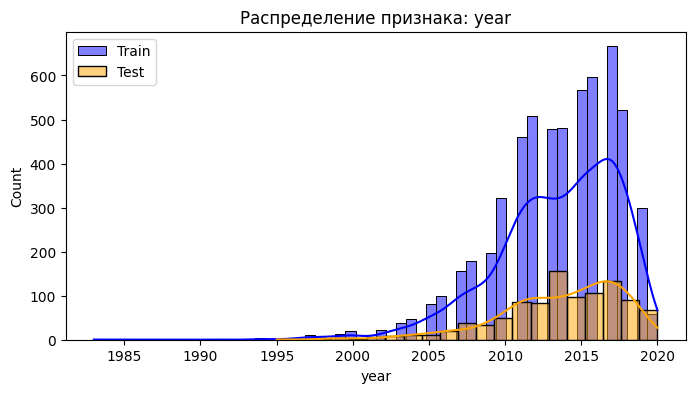

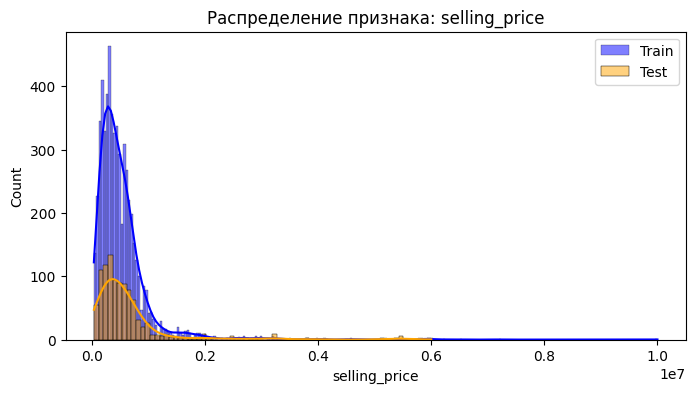

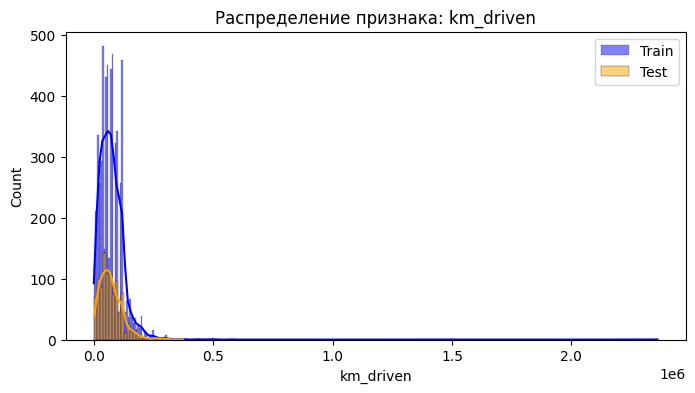

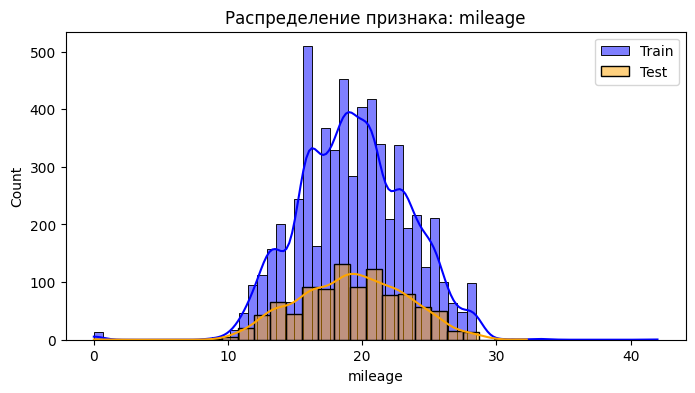

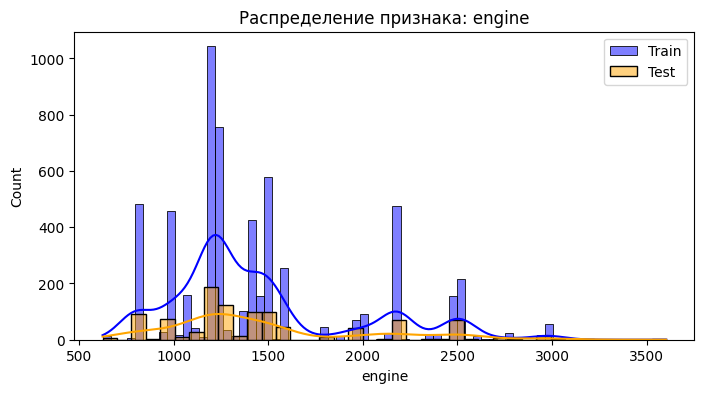

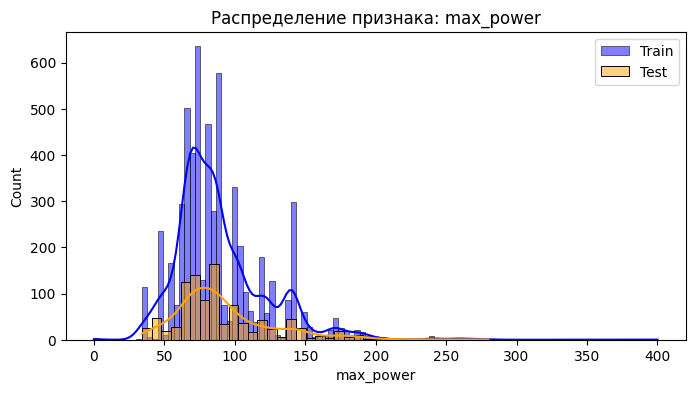

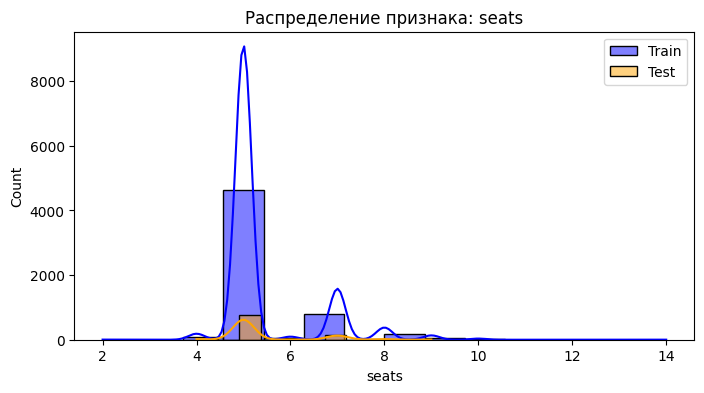

In [22]:
for column in df_train.select_dtypes(include=['float', 'int']).columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_train[column], kde=True, color='blue', label='Train')
    sns.histplot(df_test[column], kde=True, color='orange', label='Test', alpha=0.5)
    plt.title(f'Распределение признака: {column}')
    plt.legend()
    plt.show()

### **Задание 6 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


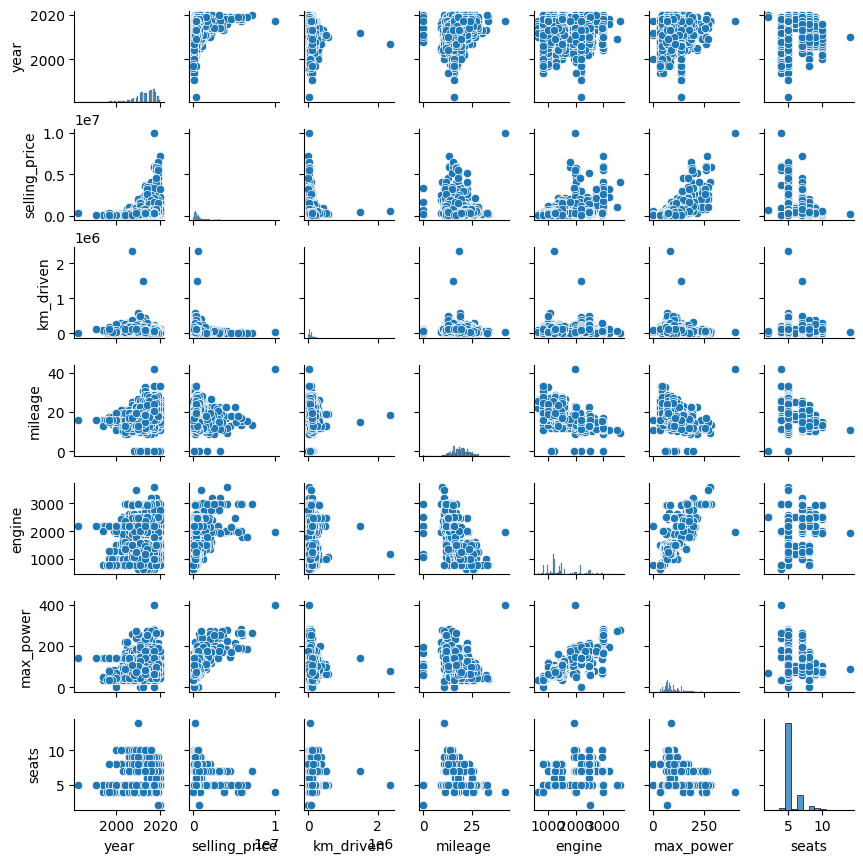

In [23]:
sns.pairplot(df_train,size=1.25)

Из графиков видно что цена имеет заметную корреляцию с годом выпуска, более дорогие автомобили расположены в правой части.Наблюдается снижение стоимости по мере увеличения пробега. Также наблюдается рост цены по мере увеличения параметров двигателя и максимально мощности. Также наиболее высокие цены  сгруппированы вокруг 5-местных авто. По мере увеличения mileage стоимость снижается

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


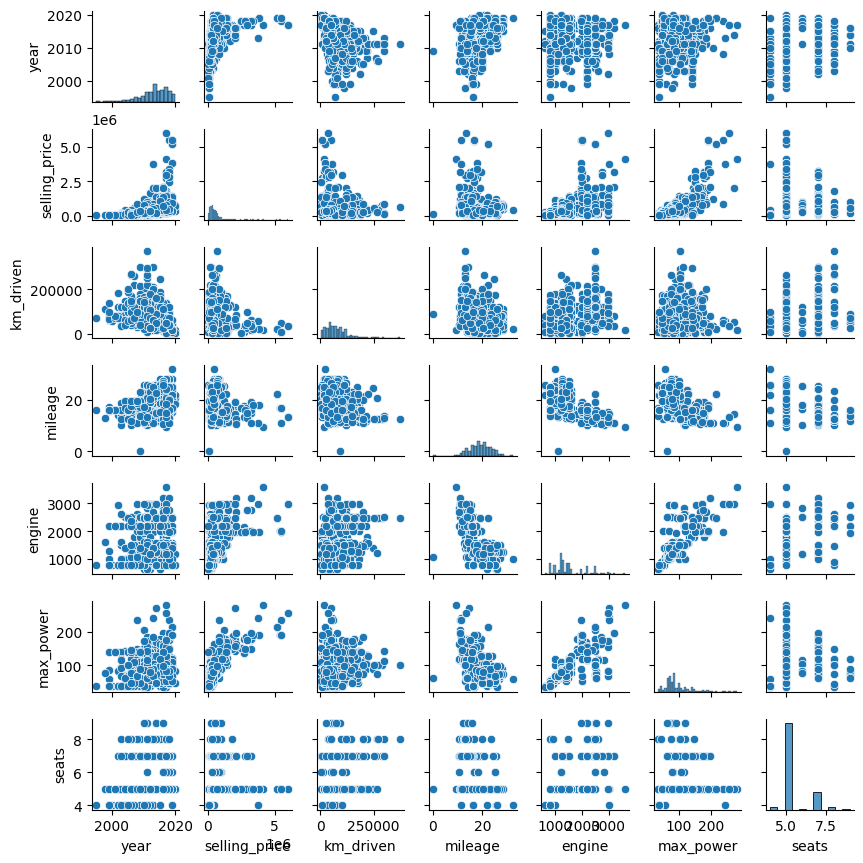

In [24]:
sns.pairplot(df_test,size=1.25)

В тестовом наборе прослеживаются все теже связи, но в этот раз представлено больше автомобилей с пробегом, и по переменной max_power наблюдается некоторая ступенька в цене. По мере увеличения mileage стоимость снижается более выраженно в сравнении с трейновой частью


### **Задание 7 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)


In [25]:
df_train.corr('pearson',numeric_only=True)

year  selling_price  km_driven   mileage    engine  \
year           1.000000       0.427279  -0.368966  0.377616 -0.086306   
selling_price  0.427279       1.000000  -0.164828 -0.088820  0.400464   
km_driven     -0.368966      -0.164828   1.000000 -0.187746  0.239466   
mileage        0.377616      -0.088820  -0.187746  1.000000 -0.587293   
engine        -0.086306       0.400464   0.239466 -0.587293  1.000000   
max_power      0.067441       0.635524   0.039808 -0.393746  0.700501   
seats          0.041178       0.149953   0.192328 -0.434422  0.605486   

               max_power     seats  
year            0.067441  0.041178  
selling_price   0.635524  0.149953  
km_driven       0.039808  0.192328  
mileage        -0.393746 -0.434422  
engine          0.700501  0.605486  
max_power       1.000000  0.209528  
seats           0.209528  1.000000

<Axes: >

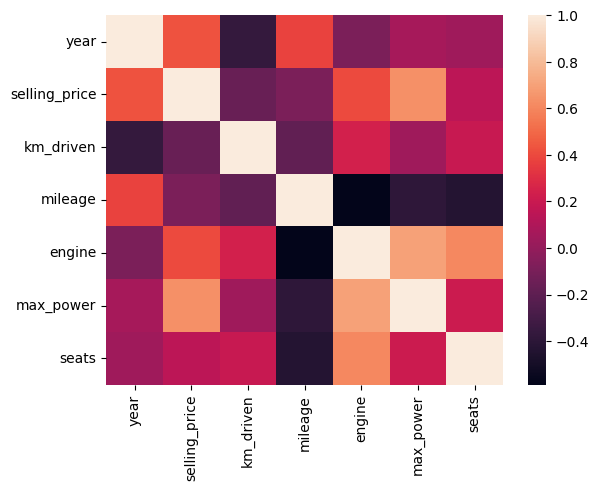

In [26]:
sns.heatmap(df_train.corr('pearson',numeric_only=True))

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

km_driven и max_power имеют самую слабую корреляцию
двигатель и максимальная мощность имеют самую сильную корреляцию
у даты производства и пробега отрицательная корреляция -> чем меньше год, тем вероятно больше пробег

### **Бонус (0.5 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их **и поясните.**

In [27]:
# your code here

# **Часть 2 | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.25 балла;

### **Задание 8 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [28]:
df_train.select_dtypes(include=['float','int'])

year  selling_price  km_driven  mileage  engine  max_power  seats
0     2014         450000     145500    23.40    1248      74.00      5
1     2014         370000     120000    21.14    1498     103.52      5
2     2010         225000     127000    23.00    1396      90.00      5
3     2007         130000     120000    16.10    1298      88.20      5
4     2017         440000      45000    20.14    1197      81.86      5
...    ...            ...        ...      ...     ...        ...    ...
5835  2008         120000     191000    17.92    1086      62.10      5
5836  2013         260000      50000    18.90     998      67.10      5
5837  2013         320000     110000    18.50    1197      82.85      5
5838  2007         135000     119000    16.80    1493     110.00      5
5839  2009         382000     120000    19.30    1248      73.90      5

[5840 rows x 7 columns]

In [149]:
y_train = df_train.selling_price
X_train = df_train.select_dtypes(include=['float','int']).drop('selling_price',axis=1)

In [150]:
assert X_train.shape == (5840, 6)

In [151]:
y_test = df_test.selling_price
X_test = df_test.select_dtypes(include=['float','int']).drop('selling_price',axis=1)

In [152]:
assert X_test.shape == (1000, 6)

### **Задание 9 (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [153]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

lr = LinearRegression()
lr.fit(X_train,y_train)
predict = lr.predict(X_test)
print('r2_score',r2_score(y_test,predict))
print('MSE',MSE(y_test,predict))

r2_score 0.5605313485615067
MSE 252619130154.76413


не самый плохой результат по r2_score, но очевидно, что эти признаки не оставляют значительную долю дисперсии необъясненной
MSE трудно интерпретировать, хотя число огромное =D

### **Задание 10 (0.15 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [154]:
from sklearn.preprocessing import StandardScaler

values_columns = X_train.columns
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


lr = LinearRegression()
lr.fit(X_train,y_train)
predict = lr.predict(X_test)
print('r2_score',r2_score(y_test,predict))
print('MSE',MSE(y_test,predict))

r2_score 0.5605313485615028
MSE 252619130154.76633


### **Задание 11 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [155]:
lr_coef_ = pd.DataFrame(lr.coef_).T
lr_coef_.columns = values_columns
lr_coef_.T.sort_values(0)

0
km_driven  -33843.803951
seats        5871.965006
mileage     13978.561399
engine      20397.337023
year       191018.750084
max_power  318700.730233

Самым информативным признаком оказался пробег

### **Задание 12 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [156]:
from sklearn.linear_model import Lasso

# your code here
model = Lasso()
model.fit(X_train,y_train)
predict = model.predict(X_test)
print('r2_score',r2_score(y_test,predict))
print('MSE',MSE(y_test,predict))

r2_score 0.560530624741326
MSE 252619546227.27307


In [157]:
lr_coef_ = pd.DataFrame(model.coef_).T
lr_coef_.columns = values_columns
lr_coef_.T.sort_values(0)

0
km_driven  -33842.487850
seats        5870.543914
mileage     13975.853844
engine      20395.942531
year       191019.240524
max_power  318699.851584

Модель не занулила веса, т.к. данные довольно простые

### **Задание 13 Финальный рывок (0.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [158]:
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}

model = Lasso()
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='r2', cv=10, n_jobs=-1)

grid_search.fit(X_train, y_train)

best_param = grid_search.best_params_['alpha']
print(f"грид-сёрчу пришлось обучать {len(param_grid['alpha'] * 10)} моделей")
print("коэффициент регуляризации у лучшей из перебранных моделей:",best_param)

грид-сёрчу пришлось обучать 70 моделей
коэффициент регуляризации у лучшей из перебранных моделей: 100


In [159]:
# your code here
best_model = grid_search.best_estimator_
predict = best_model.predict(X_test)

print('r2_score',r2_score(y_test,predict))
print('MSE',MSE(y_test,predict))

r2_score 0.5604593187018152
MSE 252660534974.97342


In [160]:
lr_coef_ = pd.DataFrame(best_model.coef_).T
lr_coef_.columns = values_columns
lr_coef_.T.sort_values(0)

0
km_driven  -33714.360019
seats        5726.378446
mileage     13713.169419
engine      20270.034740
year       191066.169767
max_power  318607.787971

веса опять не занулились

**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [161]:
from sklearn.linear_model import ElasticNet



param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10],
              'l1_ratio': [0.1, 0.5, 0.9]}

model = ElasticNet()
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='r2', cv=10, n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

print(f"грид-сёрчу пришлось обучать {len(param_grid['alpha'] * 10*len(param_grid['l1_ratio']))} моделей")
print("коэффициент регуляризации у лучшей из перебранных моделей:",best_params['alpha'])
print("l1_ratio у лучшей из перебранных моделей:",best_params['l1_ratio'])

грид-сёрчу пришлось обучать 180 моделей
коэффициент регуляризации у лучшей из перебранных моделей: 1
l1_ratio у лучшей из перебранных моделей: 0.9


In [162]:
# your code here
best_model = grid_search.best_estimator_
predict = best_model.predict(X_test)

print('r2_score',r2_score(y_test,predict))
print('MSE',MSE(y_test,predict))

r2_score 0.5385312686383126
MSE 265265404320.9441


In [163]:
lr_coef_ = pd.DataFrame(best_model.coef_).T
lr_coef_.columns = values_columns
lr_coef_.T.sort_values(0)

0
km_driven  -39266.984132
seats       -2408.921249
mileage     13633.767545
engine      53268.226615
year       177749.664163
max_power  271258.016457

# **Часть 3| Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.75 основных балла и 0.25 бонусных.


### **Задание 14 (0.1 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
- [ ] Удалить столбец`name`

In [164]:
X_train_cat = df_train.drop(['name','selling_price'],axis=1)
X_test_cat = df_test.drop(['name','selling_price'],axis=1)

In [165]:
X_train_cat

year  km_driven    fuel seller_type transmission                 owner  \
0     2014     145500  Diesel  Individual       Manual           First Owner   
1     2014     120000  Diesel  Individual       Manual          Second Owner   
2     2010     127000  Diesel  Individual       Manual           First Owner   
3     2007     120000  Petrol  Individual       Manual           First Owner   
4     2017      45000  Petrol  Individual       Manual           First Owner   
...    ...        ...     ...         ...          ...                   ...   
5835  2008     191000  Petrol  Individual       Manual           First Owner   
5836  2013      50000  Petrol  Individual       Manual          Second Owner   
5837  2013     110000  Petrol  Individual       Manual           First Owner   
5838  2007     119000  Diesel  Individual       Manual  Fourth & Above Owner   
5839  2009     120000  Diesel  Individual       Manual           First Owner   

      mileage  engine  max_power  seats  
0       23.40    1248      74.00      5  
1       21.14    1498     103.52      5  
2       23.00    1396      90.00      5  
3       16.10    1298      88.20      5  
4       20.14    1197      81.86      5  
...       ...     ...        ...    ...  
5835    17.92    1086      62.10      5  
5836    18.90     998      67.10      5  
5837    18.50    1197      82.85      5  
5838    16.80    1493     110.00      5  
5839    19.30    1248      73.90      5  

[5840 rows x 10 columns]

В другом случае, конечно, мы могли бы предобработать данный столбец. В качестве бонуса предлагаем вам придумать и реализовать алгоритм предобработки.

### **Бонус 0.5 балла**
- [ ] Предобработайте столбец `name`, чтобы избежать его удаления

In [166]:
assert X_train_cat.shape == (5840, 10)

In [167]:
X_train_cat.describe(include='object')

fuel seller_type transmission        owner
count     5840        5840         5840         5840
unique       4           3            2            5
top     Diesel  Individual       Manual  First Owner
freq      3177        5223         5336         3603

### **Задание 15 (0.4 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [168]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

cats = ['fuel', 'seller_type', 'transmission', 'owner', 'seats']

encoder = OneHotEncoder(drop='first',sparse_output=False)
encoder.fit(X_train_cat[cats])


new_features_train = encoder.transform(X_train_cat[cats])
new_features_test = encoder.transform(X_test_cat[cats])
encoded_X_train_cat = pd.DataFrame(new_features_train, columns=encoder.get_feature_names_out(cats), index=X_train_cat.index)
encoded_X_test_cat = pd.DataFrame(new_features_test, columns=encoder.get_feature_names_out(cats), index=X_test_cat.index)

In [171]:
X_train_values_and_cats = pd.concat([pd.DataFrame(X_train,columns=values_columns),encoded_X_train_cat],axis=1)
X_test_values_and_cats = pd.concat([pd.DataFrame(X_test,columns=values_columns),encoded_X_test_cat],axis=1)
X_train_values_and_cats

year  km_driven   mileage    engine  max_power     seats  \
0     0.139570   1.191152  1.011299 -0.420695  -0.477531 -0.434419   
1     0.139570   0.766619  0.450637  0.077521   0.419537 -0.434419   
2    -0.837167   0.883158  0.912067 -0.125751   0.008685 -0.434419   
3    -1.569719   0.766619 -0.799691 -0.321052  -0.046014 -0.434419   
4     0.872122  -0.482007  0.202556 -0.522331  -0.238677 -0.434419   
...        ...        ...       ...       ...        ...       ...   
5835 -1.325535   1.948653 -0.348184 -0.743538  -0.839154 -0.434419   
5836 -0.104614  -0.398765 -0.105064 -0.918910  -0.687211 -0.434419   
5837 -0.104614   0.600136 -0.204297 -0.522331  -0.208593 -0.434419   
5838 -1.569719   0.749971 -0.626034  0.067557   0.616454 -0.434419   
5839 -1.081351   0.766619 -0.005832 -0.420695  -0.480570 -0.434419   

      fuel_Diesel  fuel_LPG  fuel_Petrol  seller_type_Individual  ...  \
0             1.0       0.0          0.0                     1.0  ...   
1             1.0       0.0          0.0                     1.0  ...   
2             1.0       0.0          0.0                     1.0  ...   
3             0.0       0.0          1.0                     1.0  ...   
4             0.0       0.0          1.0                     1.0  ...   
...           ...       ...          ...                     ...  ...   
5835          0.0       0.0          1.0                     1.0  ...   
5836          0.0       0.0          1.0                     1.0  ...   
5837          0.0       0.0          1.0                     1.0  ...   
5838          1.0       0.0          0.0                     1.0  ...   
5839          1.0       0.0          0.0                     1.0  ...   

      owner_Test Drive Car  owner_Third Owner  seats_4  seats_5  seats_6  \
0                      0.0                0.0      0.0      1.0      0.0   
1                      0.0                0.0      0.0      1.0      0.0   
2                      0.0                0.0      0.0      1.0      0.0   
3                      0.0                0.0      0.0      1.0      0.0   
4                      0.0                0.0      0.0      1.0      0.0   
...                    ...                ...      ...      ...      ...   
5835                   0.0                0.0      0.0      1.0      0.0   
5836                   0.0                0.0      0.0      1.0      0.0   
5837                   0.0                0.0      0.0      1.0      0.0   
5838                   0.0                0.0      0.0      1.0      0.0   
5839                   0.0                0.0      0.0      1.0      0.0   

      seats_7  seats_8  seats_9  seats_10  seats_14  
0         0.0      0.0      0.0       0.0       0.0  
1         0.0      0.0      0.0       0.0       0.0  
2         0.0      0.0      0.0       0.0       0.0  
3         0.0      0.0      0.0       0.0       0.0  
4         0.0      0.0      0.0       0.0       0.0  
...       ...      ...      ...       ...       ...  
5835      0.0      0.0      0.0       0.0       0.0  
5836      0.0      0.0      0.0       0.0       0.0  
5837      0.0      0.0      0.0       0.0       0.0  
5838      0.0      0.0      0.0       0.0       0.0  
5839      0.0      0.0      0.0       0.0       0.0  

[5840 rows x 24 columns]

### **Задание 16 (0.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [172]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV


param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}

model = Ridge()
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='r2', cv=10, n_jobs=-1)

grid_search.fit(X_train_values_and_cats, y_train)

best_param = grid_search.best_params_['alpha']
print(f"грид-сёрчу пришлось обучать {len(param_grid['alpha'] * 10)} моделей")
print("коэффициент регуляризации у лучшей из перебранных моделей:",best_param)

грид-сёрчу пришлось обучать 70 моделей
коэффициент регуляризации у лучшей из перебранных моделей: 10


In [180]:
y_train

0       450000
1       370000
2       225000
3       130000
4       440000
         ...  
5835    120000
5836    260000
5837    320000
5838    135000
5839    382000
Name: selling_price, Length: 5840, dtype: int64

In [182]:

best_model = grid_search.best_estimator_
predict = best_model.predict(X_test_values_and_cats)

print('r2_score',r2_score(y_test,predict))
print('MSE',MSE(y_test,predict))

r2_score 0.6270583007710508
MSE 214377538305.124


In [215]:
ttt = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')
ttt.mileage.apply(lambda x: str(x).replace(' kmpl', '').replace('km/kg','')).astype(float)

0      14.00
1      21.50
2      12.90
3      25.10
4      16.50
       ...  
995    19.81
996    18.60
997    23.00
998    20.36
999    26.00
Name: mileage, Length: 1000, dtype: float64

In [183]:
coef_ = pd.DataFrame(best_model.coef_).T
coef_.columns = X_test_values_and_cats.columns
coef_.T.sort_values(0)

0
transmission_Manual          -340147.360716
seats_5                      -189904.722279
seats_6                      -189742.787527
seller_type_Individual       -119758.375763
seller_type_Trustmark Dealer  -95725.369802
seats_7                       -63953.916401
owner_Second Owner            -48532.381496
fuel_Petrol                   -41246.869460
owner_Fourth & Above Owner    -39760.914793
owner_Third Owner             -39082.435375
seats                         -31935.127805
km_driven                     -24447.492432
engine                         -7826.113446
seats_14                       -1734.370871
mileage                         8850.538502
seats_8                        11180.452231
seats_9                        41553.830516
fuel_Diesel                    62058.940874
seats_10                       71565.813555
fuel_LPG                      100369.229693
year                          180122.271924
max_power                     277696.026464
seats_4                       353706.360190
owner_Test Drive Car          945317.665899

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 17 (0.5 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

In [184]:
def business_metric(y_true, y_pred):
    result = (abs((y_true - y_pred) / y_true)  <= 0.1).astype(int)

    return result.mean()
business_metric(y_test,predict)

0.246

`Your answer here`

# **Часть 5 (3 балла) | Реализация сервиса на FastAPI**

### **Задание 18 (3 балла)**


Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [188]:
import pickle

with open('model.pkl', 'wb') as f:
    pickle.dump(grid_search.best_estimator_, f)

with open('encoder.pkl', 'wb') as f:
    pickle.dump(encoder, f)

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [186]:
!pip install fastapi

In [189]:
from fastapi import FastAPI, UploadFile, File, Response
from pydantic import BaseModel
import pickle
import pandas as pd

app = FastAPI()

with open('model.pkl', 'rb') as f:
    model = pickle.load(f)

with open('encoder.pkl', 'rb') as f:
    encoder = pickle.load(f)

with open('scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)

class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str
    engine: str
    max_power: str
    torque: str
    seats: float

def preprocess_data(data):
    data.drop(['name'],axis=1)
    data.mileage = data.mileage.apply(lambda x: str(x).replace(' kmpl', '').replace('km/kg','')).astype(float)
    data.engine = data.engine.apply(lambda x: str(x).replace(' CC', '')).astype(float)
    data.max_power = data.max_power.apply(lambda x: str(x).replace(' bhp', '')).astype(float)
    data.seats = data.seats.fillna(data.seats.median()).astype(int)
    data.engine = data.engine.fillna(data.seats.median()).astype(int)
    data_values_only = data.select_dtypes(include=['float','int'])
    data_values_only = pd.DataFrame(scaler.transform(data_values_only))
    data_values_only.columns = data.select_dtypes(include=['float','int']).columns

    cats = ['fuel', 'seller_type', 'transmission', 'owner', 'seats']
    data_catagories = encoder.transform(data[cats])
    encoded_data = pd.DataFrame(data_catagories, columns=encoder.get_feature_names_out(cats), index=data.index)

    result_df = pd.concat([data_values_only,encoded_data],axis=1)
    return result_df

@app.post("/predict_item")
def predict_item(item: Item):
    data = pd.DataFrame([item.dict()])
    data = preprocess_data(data)
    prediction = model.predict(data)
    return prediction[0]

@app.post("/predict_items")
def predict_items(items):
    data = pd.DataFrame([item.dict() for item in items])
    data = preprocess_data(data)
    predictions = model.predict(data)
    return predictions.tolist()

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# **Часть 6 (1 балл) | Оформление результатов**

### **Задание 19 (1 балл)**


**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* сохраненный дашборд в любом формате
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете в md-файл приложить ссылку на screencast с демонстрацией
3. Просматривает ноутбук с DS-частью
4. Заглядывает в код сервиса
5. Хвалит

# **Часть Благодарственная**

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой!

<details>
<summary><b>Что-то приятное</b></summary>

**Напоминаем, что нашем курсе действует система кото-бонусов** 🐈

На фото по ссылке — сэр кот кого-то из команды курса (преподаватель, помощник преподавателя, ассистенты).

Предлагаем вам угадать — чей это товарищ!

[Первый кот](https://ibb.co/XbnpCTg)

</details>

